In [1]:
import pandas as pd
import seaborn as sns #regplot, kdeplot, histplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # train & test
from sklearn.linear_model import LinearRegression # train Linear Regression model
from sklearn.preprocessing import PolynomialFeatures # create Polynomial features
from sklearn.metrics import mean_squared_error, mean_absolute_error # metric

#Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

%matplotlib inline

**Predict Petalwidth**
- Choosing best features for the model using Kbest, Pearson Correlation

### Predict Petalwidth with all features

**Read & inspect data**

In [2]:
df= pd.read_excel('Iris.xls')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


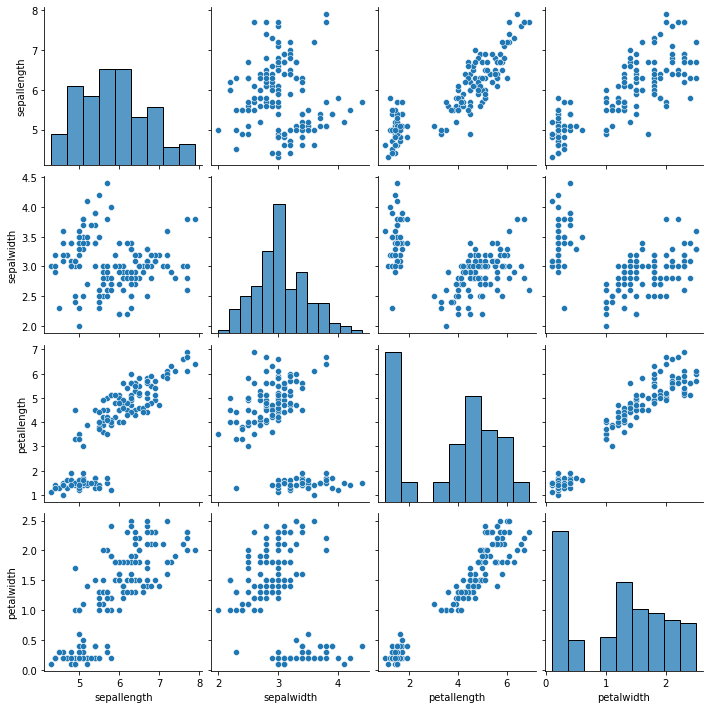

In [3]:
sns.pairplot(df)

**1.Choose feature**

In [4]:
x= df[['sepallength','sepalwidth','petallength']]
y= df['petalwidth']

**2.Split data**

In [5]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 123)

**3.Train model**

In [6]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [7]:
lm.coef_

array([-0.26687211,  0.27476292,  0.54975508])

In [8]:
x.columns

Index(['sepallength', 'sepalwidth', 'petallength'], dtype='object')

In [9]:
lm.intercept_

-0.1463805882249838

**4.Evaluate model on train & test data**

In [10]:
# Train data
lm.score(x_train,y_train)
#Rsquare= 93% >> The model can explain 91% of the variability in predicting petal length
# only 7% of the sample variability in petal length is due to factors other than what is accounted for by the model 


0.9371489777604495

In [11]:
# Train data
mean_squared_error(y_train,lm.predict(x_train),squared=True)

0.03436624061589468

In [12]:
# Test data
lm.score(x_test,y_test)
## Model performs well on both train & test data

0.9367108277906381

In [13]:
# Test data
mean_squared_error(y_test,lm.predict(x_test))

0.04388049273182427

**5.Visualize on test data**

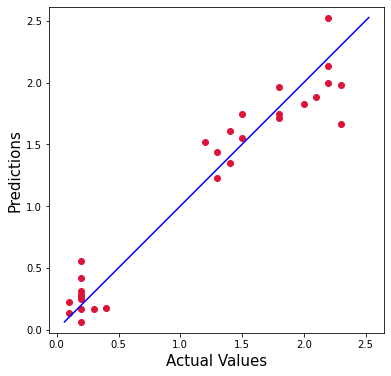

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x= y_test, y= lm.predict(x_test), c='crimson')

p1 = max(max(lm.predict(x_test)), max(y_test))
p2 = min(min(lm.predict(x_test)), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

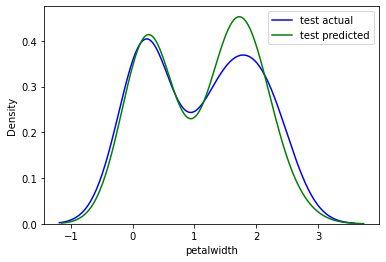

In [15]:
sns.kdeplot(y_test,color= "b", label= "test actual")
sns.kdeplot(lm.predict(x_test),color="g",label= "test predicted")
plt.legend()

### Feature selection

**Use Pearson Correlation**

In [16]:
corr= df.iloc[:,:-1].corr().round(2)

<AxesSubplot:>

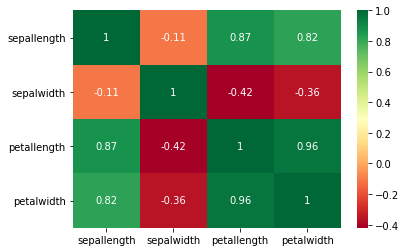

In [17]:
sns.heatmap(corr, cmap="RdYlGn",annot= True)
#Petal length and sepal length are highly corellated with target (petal width)

**Use k-best**

In [18]:
bestfeature= SelectKBest(score_func=f_regression, k='all')
fit= bestfeature.fit(x,y)

In [19]:
fit.scores_

array([ 299.1949571 ,   21.55437779, 1876.65781288])

In [20]:
x.columns

Index(['sepallength', 'sepalwidth', 'petallength'], dtype='object')

In [21]:
pd.DataFrame(fit.scores_,x.columns,columns=['Score']).sort_values('Score',ascending=False)
#Petal length and sepal length are highly corellated with target (petal width)

,Score
petallength,1876.657813
sepallength,299.194957
sepalwidth,21.554378


### Predict Petalwidth using the most impactful feature

In [22]:
x= df[['petallength']]
y= df['petalwidth']

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 123)

In [25]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
lm.score(x_train,y_train)

0.9190323703887685

In [27]:
lm.score(x_test,y_test)
# model perform well even with only one feature

0.9499492881085451